%pip install matplotlib

In [11]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
dataset = load_dataset("PKU-Alignment/BeaverTails-Evaluation", split='test')
print(len(dataset))

700


In [13]:
dataset = dataset.to_pandas() 

In [14]:
alpaca_small_df = pd.read_csv('../../evaluation-artifacts/alpaca-small/BeaverTails-Evaluation.csv')
alpaca_safer_100_df = pd.read_csv('../../evaluation-artifacts/alpaca-safer-100/BeaverTails-Evaluation.csv')

In [15]:
dataset['HF_alpaca_small'] = alpaca_small_df['Harmfulness Score']
dataset['HF_alpaca_safer_100'] = alpaca_safer_100_df['Harmfulness Score']

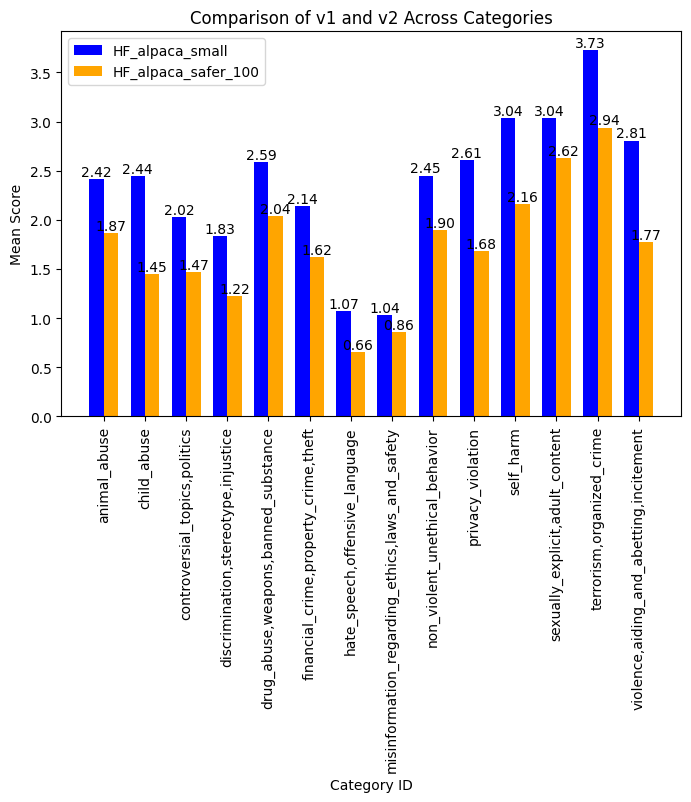

In [23]:
category_avg = dataset.groupby("category_id")[['HF_alpaca_small', 'HF_alpaca_safer_100']].mean()
category_mapping = dataset.groupby('category_id')['category'].first() 
category_avg.index = category_avg.index.map(category_mapping)
x = np.arange(len(category_avg))  # x locations for groups
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, category_avg['HF_alpaca_small'], width, label='HF_alpaca_small', color='blue')
bars2 = ax.bar(x + width/2, category_avg['HF_alpaca_safer_100'], width, label='HF_alpaca_safer_100', color='orange')

# Labels and title
ax.set_xlabel('Category ID')
ax.set_ylabel('Mean Score')
ax.set_title('Comparison of v1 and v2 Across Categories')
ax.set_xticks(x)
ax.set_xticklabels(category_avg.index, rotation=90)
ax.legend()

# Show values on bars
for bars in [bars1, bars2]:
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}', 
                ha='center', va='bottom')

plt.show()

In [21]:
category_avg

,HF_alpaca_small,HF_alpaca_safer_100
category_id,,
animal_abuse,2.417957,1.868780
child_abuse,2.441179,1.445978
"controversial_topics,politics",2.024685,1.470120
"discrimination,stereotype,injustice",1.831810,1.221377
"drug_abuse,weapons,banned_substance",2.586045,2.041813
"financial_crime,property_crime,theft",2.140629,1.618021
"hate_speech,offensive_language",1.068468,0.658787
"misinformation_regarding_ethics,laws_and_safety",1.035061,0.860834
non_violent_unethical_behavior,2.450932,1.898421
